### Gold_Price_Prediction

Data consists of various GLD (gold) prices for several days in the period of 10 years [Date- MM/DD/YYYY].

SPX - The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on 
stock exchanges in the United States.
GLD - SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.
USO - The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
SLV - The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA 
Silver Price.
EUR/USD - The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European 
Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, 
if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.

In [1]:
import pandas as pd
import numpy as np

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
os.getcwd()

'C:\\Windows\\System32\\AAAA2025'

In [2]:
df = pd.read_csv("D://Project//Gold_price_prediction.csv")

In [3]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,01-09-2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,01-10-2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,01-11-2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df['Date']

0       01-02-2008
1       01-03-2008
2       01-04-2008
3       01-07-2008
4       01-08-2008
           ...    
2285    05-08-2018
2286    05-09-2018
2287    05-10-2018
2288     5/14/2018
2289     5/16/2018
Name: Date, Length: 2290, dtype: object

In [6]:
df.shape

(2290, 6)

In [7]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [8]:
import pandas as pd

# Step 1: Convert all date strings (mixed format) to datetime safely
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Step 2: Format the datetime as needed (e.g., DD-MM-YYYY)
df['FormattedDate'] = df['Date'].dt.strftime('%d-%m-%Y')

# Step 3: Check result
print(df[['Date', 'FormattedDate']])


           Date FormattedDate
0    2008-02-01    01-02-2008
1    2008-03-01    01-03-2008
2    2008-04-01    01-04-2008
3    2008-07-01    01-07-2008
4    2008-08-01    01-08-2008
...         ...           ...
2285 2018-08-05    05-08-2018
2286 2018-09-05    05-09-2018
2287 2018-10-05    05-10-2018
2288 2018-05-14    14-05-2018
2289 2018-05-16    16-05-2018

[2290 rows x 2 columns]


In [9]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD,FormattedDate
0,2008-02-01,1447.160034,84.860001,78.470001,15.180000,1.471692,01-02-2008
1,2008-03-01,1447.160034,85.570000,78.370003,15.285000,1.474491,01-03-2008
2,2008-04-01,1411.630005,85.129997,77.309998,15.167000,1.475492,01-04-2008
3,2008-07-01,1416.180054,84.769997,75.500000,15.053000,1.468299,01-07-2008
4,2008-08-01,1390.189941,86.779999,76.059998,15.590000,1.557099,01-08-2008
5,2008-09-01,1409.130005,86.550003,75.250000,15.520000,1.466405,01-09-2008
6,2008-10-01,1420.329956,88.250000,74.019997,16.061001,1.480100,01-10-2008
7,2008-11-01,1401.020020,88.580002,73.089996,16.077000,1.479006,01-11-2008
8,2008-01-14,1416.250000,89.540001,74.250000,16.280001,1.486900,14-01-2008
9,2008-01-15,1380.949951,87.989998,72.779999,15.834000,1.480210,15-01-2008


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2290 non-null   datetime64[ns]
 1   SPX            2290 non-null   float64       
 2   GLD            2290 non-null   float64       
 3   USO            2290 non-null   float64       
 4   SLV            2290 non-null   float64       
 5   EUR/USD        2290 non-null   float64       
 6   FormattedDate  2290 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 125.4+ KB


In [11]:
df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-20 18:12:15.720524032,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-23 06:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-18 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-18 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-12-04 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [12]:
correlation = df.corr

In [13]:
correlation

<bound method DataFrame.corr of            Date          SPX         GLD        USO      SLV   EUR/USD  \
0    2008-02-01  1447.160034   84.860001  78.470001  15.1800  1.471692   
1    2008-03-01  1447.160034   85.570000  78.370003  15.2850  1.474491   
2    2008-04-01  1411.630005   85.129997  77.309998  15.1670  1.475492   
3    2008-07-01  1416.180054   84.769997  75.500000  15.0530  1.468299   
4    2008-08-01  1390.189941   86.779999  76.059998  15.5900  1.557099   
...         ...          ...         ...        ...      ...       ...   
2285 2018-08-05  2671.919922  124.589996  14.060000  15.5100  1.186789   
2286 2018-09-05  2697.790039  124.330002  14.370000  15.5300  1.184722   
2287 2018-10-05  2723.070068  125.180000  14.410000  15.7400  1.191753   
2288 2018-05-14  2730.129883  124.489998  14.380000  15.5600  1.193118   
2289 2018-05-16  2725.780029  122.543800  14.405800  15.4542  1.182033   

     FormattedDate  
0       01-02-2008  
1       01-03-2008  
2       01-04-20

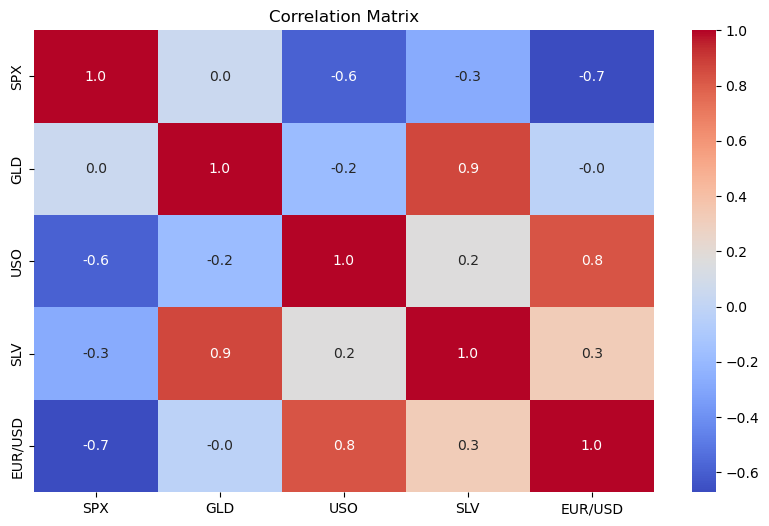

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
correlation = df.corr(numeric_only=True)   # Generate the correlation matrix
print(correlation['GLD'])                  # Get correlation of all columns with 'GLD'


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

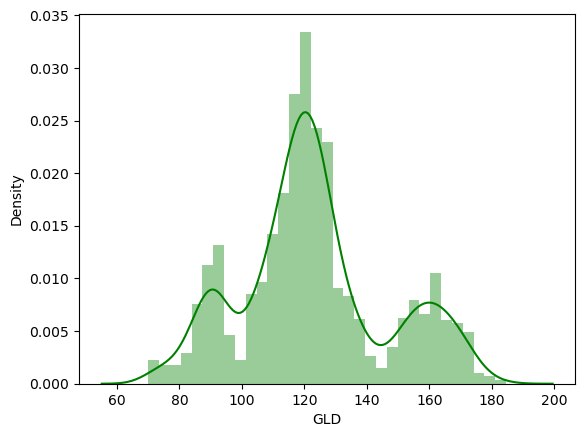

In [16]:
sns.distplot(df['GLD'],color='green')

In [17]:
df.dtypes

Date             datetime64[ns]
SPX                     float64
GLD                     float64
USO                     float64
SLV                     float64
EUR/USD                 float64
FormattedDate            object
dtype: object

In [18]:
df['FormattedDate'] = pd.to_datetime(df['FormattedDate'], format='%d-%m-%Y', errors='coerce')

In [19]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,FormattedDate
0,2008-02-01,1447.160034,84.860001,78.470001,15.180,1.471692,2008-02-01
1,2008-03-01,1447.160034,85.570000,78.370003,15.285,1.474491,2008-03-01
2,2008-04-01,1411.630005,85.129997,77.309998,15.167,1.475492,2008-04-01
3,2008-07-01,1416.180054,84.769997,75.500000,15.053,1.468299,2008-07-01
4,2008-08-01,1390.189941,86.779999,76.059998,15.590,1.557099,2008-08-01


In [20]:
df['Year'] = df['FormattedDate'].dt.year


In [21]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD,FormattedDate,Year
0,2008-02-01,1447.160034,84.860001,78.470001,15.1800,1.471692,2008-02-01,2008
1,2008-03-01,1447.160034,85.570000,78.370003,15.2850,1.474491,2008-03-01,2008
2,2008-04-01,1411.630005,85.129997,77.309998,15.1670,1.475492,2008-04-01,2008
3,2008-07-01,1416.180054,84.769997,75.500000,15.0530,1.468299,2008-07-01,2008
4,2008-08-01,1390.189941,86.779999,76.059998,15.5900,1.557099,2008-08-01,2008
...,...,...,...,...,...,...,...,...
2285,2018-08-05,2671.919922,124.589996,14.060000,15.5100,1.186789,2018-08-05,2018
2286,2018-09-05,2697.790039,124.330002,14.370000,15.5300,1.184722,2018-09-05,2018
2287,2018-10-05,2723.070068,125.180000,14.410000,15.7400,1.191753,2018-10-05,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,2018-05-14,2018


In [22]:
df.dtypes

Date             datetime64[ns]
SPX                     float64
GLD                     float64
USO                     float64
SLV                     float64
EUR/USD                 float64
FormattedDate    datetime64[ns]
Year                      int32
dtype: object

### This is a Heading 3

In [23]:
# Find the row where GLD is maximum
max_gld_row = df.loc[df['GLD'].idxmax()]

# Print the Date, FormattedDate, and Year where GLD is highest
print("Date with highest GLD:")
print(f"Date: {max_gld_row['Date']}")
print(f"FormattedDate: {max_gld_row['FormattedDate']}")
print(f"Year: {max_gld_row['Year']}")
print(f"GLD value: {max_gld_row['GLD']}")


Date with highest GLD:
Date: 2011-08-22 00:00:00
FormattedDate: 2011-08-22 00:00:00
Year: 2011
GLD value: 184.589996


In [24]:
# Find the row where GLD is minimum
min_gld_row = df.loc[df['GLD'].idxmin()]

# Print the Date, FormattedDate, and Year where GLD is lowest
print("Date with lowest GLD:")
print(f"Date: {min_gld_row['Date']}")
print(f"FormattedDate: {min_gld_row['FormattedDate']}")
print(f"Year: {min_gld_row['Year']}")
print(f"GLD value: {min_gld_row['GLD']}")


Date with lowest GLD:
Date: 2008-12-11 00:00:00
FormattedDate: 2008-12-11 00:00:00
Year: 2008
GLD value: 70.0


In [25]:
X = df.drop(['Date', 'FormattedDate','GLD'], axis = 1)
y = df['GLD']

In [26]:
print(X)

              SPX        USO      SLV   EUR/USD  Year
0     1447.160034  78.470001  15.1800  1.471692  2008
1     1447.160034  78.370003  15.2850  1.474491  2008
2     1411.630005  77.309998  15.1670  1.475492  2008
3     1416.180054  75.500000  15.0530  1.468299  2008
4     1390.189941  76.059998  15.5900  1.557099  2008
...           ...        ...      ...       ...   ...
2285  2671.919922  14.060000  15.5100  1.186789  2018
2286  2697.790039  14.370000  15.5300  1.184722  2018
2287  2723.070068  14.410000  15.7400  1.191753  2018
2288  2730.129883  14.380000  15.5600  1.193118  2018
2289  2725.780029  14.405800  15.4542  1.182033  2018

[2290 rows x 5 columns]


In [27]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Data Spliting into Training Data and Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

## Model Evaluation

In [35]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.46289979  82.11249998 115.85840038 127.61170107 120.35480118
 154.85409818 149.94319837 126.1087005  117.44549867 125.8440014
 116.15970112 172.38170075 141.34999898 167.9795981  115.14870044
 117.5014005  138.36290407 170.24290087 159.93990321 157.12439928
 155.17850076 123.37950021 175.72119973 157.02960419 125.19790039
  93.77479971  76.92280042 119.9764003  119.17189974 167.41720042
  88.06890041 125.2934999   91.1765007  117.57840049 120.96509935
 135.88220086 115.75820131 114.62560086 147.32240012 107.12230101
 105.90110253  86.96169786 126.3277006  118.06190003 154.01839909
 120.06109926 108.42849997 108.09159834  93.11960028 127.24249779
  75.7887001  113.63109954 120.43129972 111.16549959 118.8494989
 120.24189962 159.57069926 167.74030148 147.24389722  86.16889921
  94.26810044  86.86099866  90.69329998 119.04070089 126.44250085
 127.65670042 168.75659977 122.15209942 117.91719846  98.39980017
 168.35550083 143.28859853 132.30400251 120.43360103 123.47749885
 119.5572004

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9908610070128164


Compare the Actual Values and Predicted Values in a Plot

In [38]:
Y_test = list(Y_test)

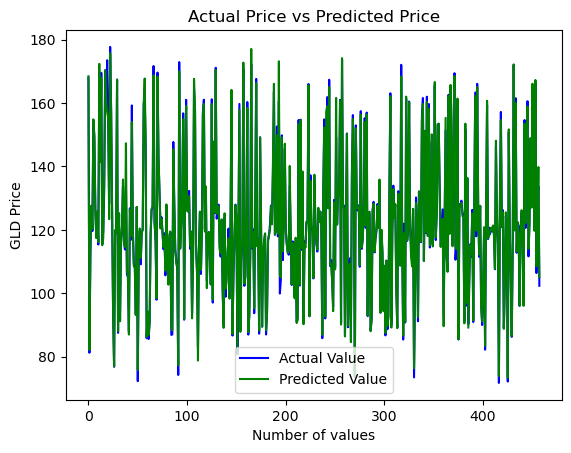

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

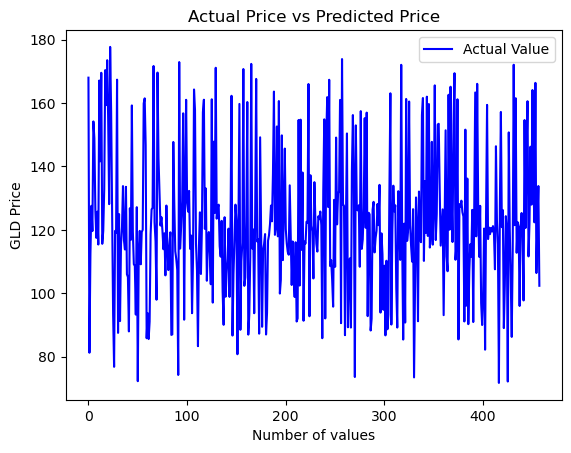

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
#plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

### Linear Regression

In [29]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

### Evaluate the model

In [31]:
print("Mean Squared Error:", mean_squared_error(Y_test, y_pred))
print("R-squared Score:", r2_score(Y_test, y_pred))

Mean Squared Error: 57.916854836467465
R-squared Score: 0.8901932533727349
